In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt

In [2]:
df = pd.read_csv("House_20.csv")
data = df.copy()
df

,Area,Price
0,1600,333000
1,2000,444000
2,2600,555000
3,3000,666000
4,4000,777000
5,5000,888000
6,6000,999000


In [3]:
df.describe()

,Area,Price
count,7.000000,7.000000
mean,3457.142857,666000.000000
std,1615.402058,239787.405841
min,1600.000000,333000.000000
25%,2300.000000,499500.000000
50%,3000.000000,666000.000000
75%,4500.000000,832500.000000
max,6000.000000,999000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Area    7 non-null      int64
 1   Price   7 non-null      int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [5]:
df.isna().sum()

Area     0
Price    0
dtype: int64

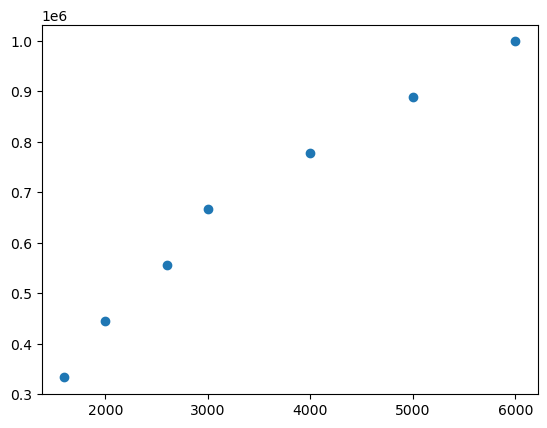

In [6]:
mlt.scatter(df.Area,df.Price)

In [18]:
x = np.array(df.Area).reshape(-1, 1)
y = np.array(df.Price).reshape(-1, 1)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(x,y)

LinearRegression()

In [20]:
model.predict([[3500]])

array([[672258.94160584]])

In [21]:
model.coef_

array([[146.0419708]])

In [22]:
model.intercept_

array([161112.04379562])

In [23]:
to_predict = pd.read_csv("predict_price.csv")
to_predict

,Area
0,1800
1,2200
2,2700
3,3500
4,4500
5,5500
6,6600
7,7500
8,8500


In [24]:
x_newArea = np.array(to_predict.Area).reshape(-1, 1)
x_newArea

array([[1800],
       [2200],
       [2700],
       [3500],
       [4500],
       [5500],
       [6600],
       [7500],
       [8500]])

In [25]:
Price_predicted = model.predict(x_newArea)

In [26]:
Price_predicted

array([[ 423987.59124088],
       [ 482404.37956204],
       [ 555425.3649635 ],
       [ 672258.94160584],
       [ 818300.91240876],
       [ 964342.88321168],
       [1124989.05109489],
       [1256426.82481752],
       [1402468.79562044]])

In [27]:
to_predict['Predicted_price'] = Price_predicted
to_predict

,Area,Predicted_price
0,1800,4.239876e+05
1,2200,4.824044e+05
2,2700,5.554254e+05
3,3500,6.722589e+05
4,4500,8.183009e+05
5,5500,9.643429e+05
6,6600,1.124989e+06
7,7500,1.256427e+06
8,8500,1.402469e+06


In [28]:
to_predict.to_csv('predicted_values')